# **The Segmentation Mask Merger 4000**
#### Amil Khan | BisQue UCSB
***

## Import Dependencies

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import nibabel as nib
import cv2
import os
import h5py
%matplotlib inline
plt.rcParams['figure.dpi'] = 200

## Plot a Test Image

This helper function takes in one argument, `img_path`, which is simply the path of the image on your local computer. This step can be stepped if:
- You know what your data looks like
- Trust that everything in this notebook works
- Verified the absolute path of your image

**Arguments:**
- `img_path `: local path to volumetric image data, i.e. `.tif`

In [52]:
def image_visualizer5000(img_path):
    img = plt.imread(img_path)
    filename, file_extension = os.path.splitext(img_path)
    plt.imshow(img,cmap='gray')
    plt.title("Filename: {}".format(filename[2:] + file_extension))
    plt.axis('off')
    print("Image Shape:", img.shape)

Image Shape: (512, 512)


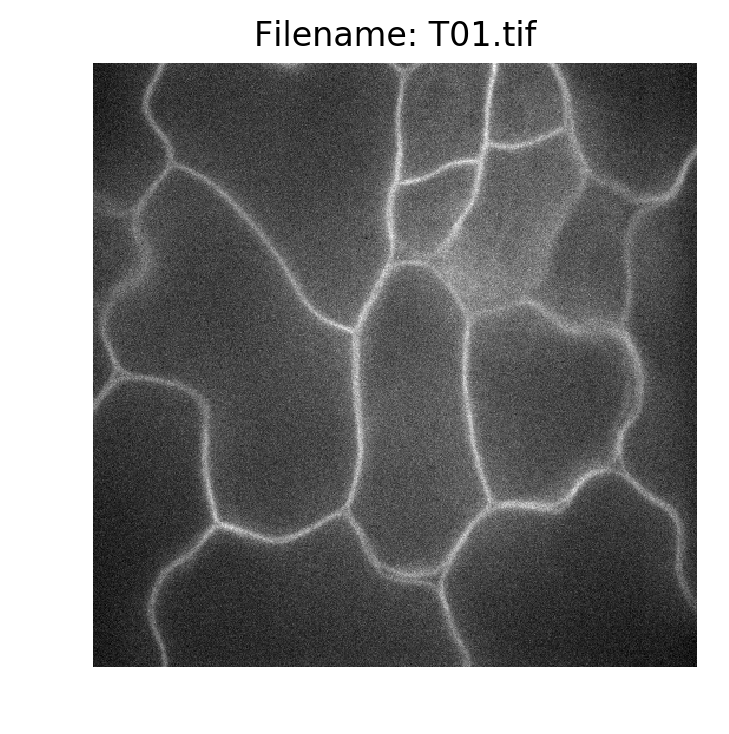

In [53]:
image_visualizer5000('./T01.tif')

## Segmentation Function

This function overlays a masked image over the original image
 takes two arguments, `NIFTI_img` and `volumetric_img`. 

**Arguments:**
- `NIFTI_img `: local path to NIFTI image, i.e. `.nii`
- `volumetric_img `: local path to volumetric image data, i.e. `.tif`

**Output:**
- Overlaid image. Basically, NIFTI image + Volumetric with slight darkening to non-segmented region

In [57]:
def segmentation(NIFTI_img, volumetric_img):
    
    filename, file_extension = os.path.splitext(NIFTI_img)
    if file_extension != '.nii': 
        print("Invalid Filetype  --> ",filename+file_extension,"\nPlease check the filepath and/or if you are importing a valid NIFTI image.")
        return None

    nii_img = nib.load(NIFTI_img)
    nii_img = np.asarray(nii_img.get_fdata())
    print("Successfully Loaded NIFTI Image", NIFTI_img)
    
    mask = cv2.imread(volumetric_img, cv2.IMREAD_GRAYSCALE)
    mask = np.rollaxis(mask, axis=1)
    print("Successfully Loaded Mask")
    overlay = np.zeros_like(nii_img)
    
    for i in range(nii_img.shape[-1]):
        overlay[:,:,i] = np.where((nii_img[:,:,i] >= 2) , mask, nii_img[:,:,i]*mask+mask/3)
    print("\nSegmentation Merge Finished!\nOutput Shape:", np.rollaxis(overlay, axis=2).shape)
    return np.rollaxis(overlay, axis=2)

In [58]:
tom = segmentation('./two_cells.nii', './T01.tif')

Successfully Loaded NIFTI Image ./two_cells.nii
Successfully Loaded Mask

Segmentation Merge Finished!
Output Shape: (28, 512, 512)


## Verify the Output Image

(-0.5, 511.5, 511.5, -0.5)

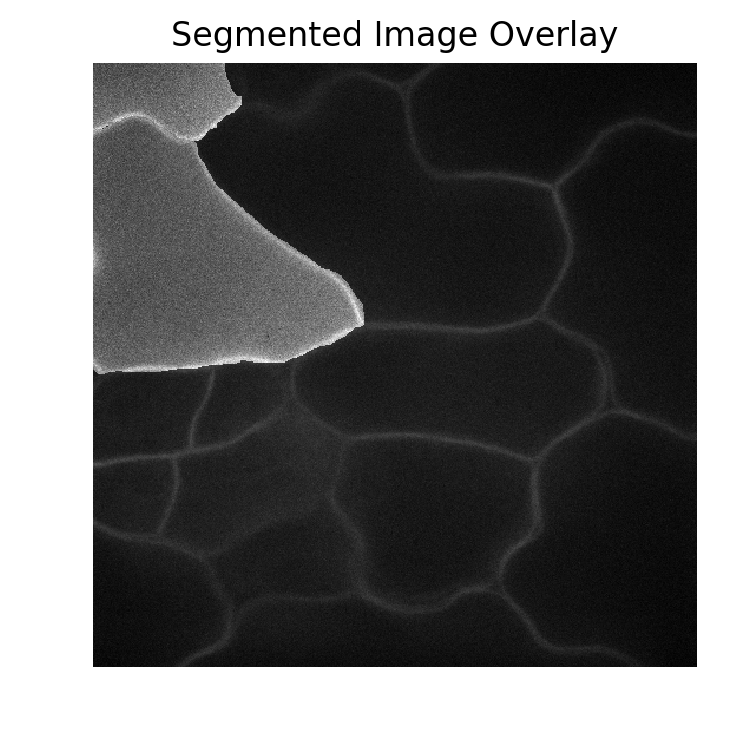

In [60]:
plt.imshow(tom[2], cmap='gray')
plt.title('Segmented Image Overlay')
plt.axis('off')

## Output to HDF file

If you are feeling ambitious, you can output the image to an HDF file and visualize it in 2D slices and a 3D volume using [BisQue](https://bisque.ece.ucsb.edu/client_service/). The output file will be created in your current working directory.

**Arguments:**
- `filename `: name of the output hdf file
- `key_name `: key/name of dataset in the HDF file
- `img`: Output image from segmentation function

In [59]:
def img_to_HDF(filename, key_name, img):
    f = h5py.File(filename, 'w')
    f.create_dataset(key_name, data=img)
    f.close()

In [ ]:
img_to_HDF(filename='SuperTom.h5', key_name='Finished_Product', img=tom)

***